In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

* analyze only the users and not the admins
* create two lists of values (for working days and for weekends) for the histogram input
* the figsize is still the same, you can choose the fontsize as well as the color palette
* use a level of transparency for the histogram in front equal to 0.7

In [31]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

timestamp = pd.read_sql("SELECT timestamp FROM checker " \
"WHERE uid LIKE 'user_%' ", connection)

timestamp['hours'] = pd.to_datetime(timestamp['timestamp']).dt.hour
timestamp['day_of_week'] = pd.to_datetime(timestamp['timestamp']).dt.weekday
timestamp['is_weekend'] = timestamp['day_of_week'] >= 5
timestamp['is_weekend'] = timestamp['is_weekend'].apply(lambda row: 'weekend' if row == True else 'working_day')
timestamp

,timestamp,hours,day_of_week,is_weekend
0,2020-04-17 05:19:02.744528,5,4,working_day
1,2020-04-17 05:22:35.249331,5,4,working_day
2,2020-04-17 05:22:45.549397,5,4,working_day
3,2020-04-17 05:34:14.691200,5,4,working_day
4,2020-04-17 05:34:24.422370,5,4,working_day
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,20,3,working_day
3203,2020-05-21 20:22:41.785725,20,3,working_day
3204,2020-05-21 20:22:41.877806,20,3,working_day
3205,2020-05-21 20:37:00.129678,20,3,working_day


In [43]:
working_day = timestamp[timestamp['is_weekend'] == 'working_day'].reset_index(drop=True)
weekend = timestamp[timestamp['is_weekend'] == 'weekend'].reset_index(drop=True)
weekend

,timestamp,hours,day_of_week,is_weekend
0,2020-04-18 07:56:45.408648,7,5,weekend
1,2020-04-18 13:36:53.971502,13,5,weekend
2,2020-04-18 13:42:35.482008,13,5,weekend
3,2020-04-18 13:51:22.291271,13,5,weekend
4,2020-04-18 13:53:17.230725,13,5,weekend
...,...,...,...,...
1165,2020-05-17 22:23:05.744415,22,6,weekend
1166,2020-05-17 22:23:11.078664,22,6,weekend
1167,2020-05-17 22:23:11.220412,22,6,weekend
1168,2020-05-17 22:25:15.051189,22,6,weekend


In [42]:
working_day

,timestamp,hours,day_of_week,is_weekend
0,2020-04-17 05:19:02.744528,5,4,working_day
1,2020-04-17 05:22:35.249331,5,4,working_day
2,2020-04-17 05:22:45.549397,5,4,working_day
3,2020-04-17 05:34:14.691200,5,4,working_day
4,2020-04-17 05:34:24.422370,5,4,working_day
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,20,3,working_day
3203,2020-05-21 20:22:41.785725,20,3,working_day
3204,2020-05-21 20:22:41.877806,20,3,working_day
3205,2020-05-21 20:37:00.129678,20,3,working_day


In [33]:
connection.close()

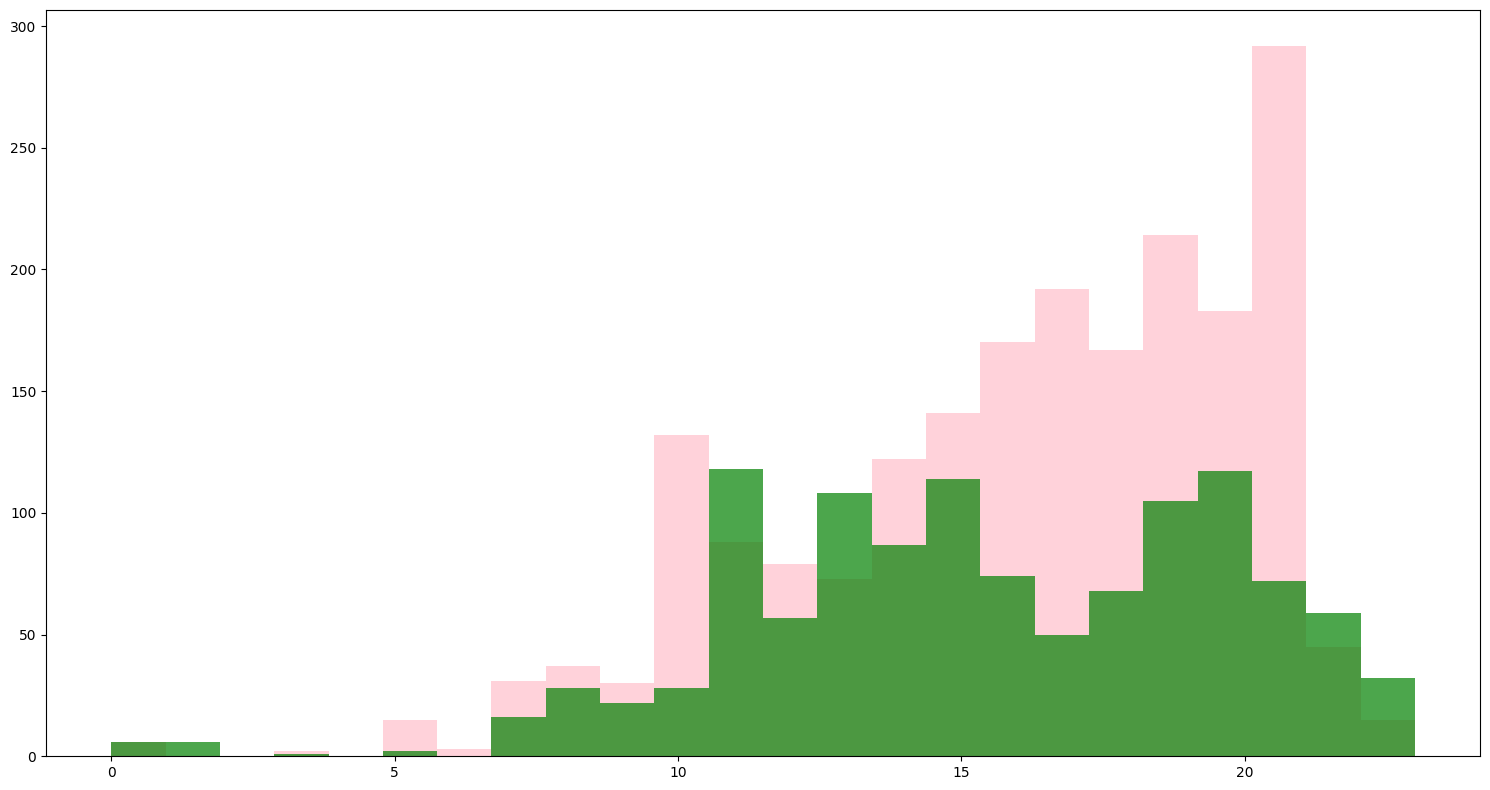

In [62]:
plt.figure(figsize=(15, 8))
plt.hist(working_day['hours'], alpha=0.7, bins=24, label='working days', color='pink')
plt.hist(weekend['hours'], alpha=0.7, bins=24, label = 'weekend', color='green')
plt.tight_layout()
plt.show()

at the end of your Jupyter Notebook, create a markdown cell and insert the question: “Are there hours when the total number of commits was higher on weekends than on working days?” In your answer, put the top-4 examples.


In [78]:
weekend_tmp = pd.DataFrame(weekend.groupby('hours').size()).reset_index().rename(columns={0 : 'count_weekend'})
working_day_tmp = pd.DataFrame(working_day.groupby('hours').size()).reset_index().rename(columns={0 : 'count_work'})
temp = working_day_tmp.merge(weekend_tmp, how='inner', on=['hours']).set_index('hours')
(temp['count_weekend'] - temp['count_work']).sort_values(ascending=False).head(4)

hours
13    35
11    30
23    17
22    14
dtype: int64

да вот